# Problem 1:
1) Delivery_time -> Predict delivery time using sorting time 

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

# 1. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr,spearmanr
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import statsmodels.formula.api as smf

from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# 2. Import dataset

In [2]:
del_data = pd.read_csv('delivery_time.csv')

# 3. Data Understanding

## 3.1 Initial Analysis

In [3]:
del_data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
del_data.shape

(21, 2)

In [5]:
del_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
del_data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:>

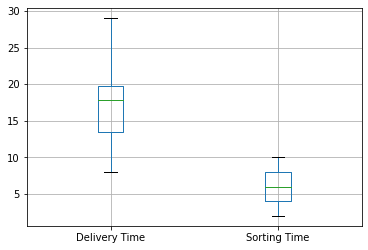

In [7]:
del_data.boxplot()

## 3.2 Assumptions Check

### 3.2.1 Linearity Test

Text(0.5, 1.0, 'Sorting Time vs Delivery Time')

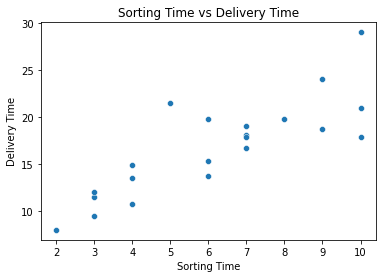

In [8]:
sns.scatterplot(x=del_data['Sorting Time'],y = del_data['Delivery Time'],data=del_data)
plt.title('Sorting Time vs Delivery Time')

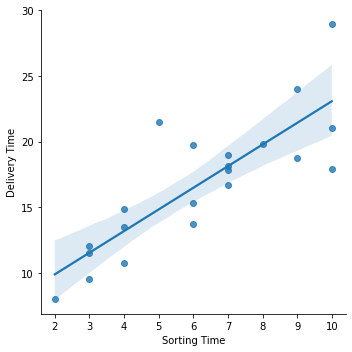

In [9]:
sns.lmplot(x='Sorting Time',y='Delivery Time',data = del_data)

In [10]:
del_data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [11]:
# Pearson's correlation coefficient
corr_coeff, p_value = pearsonr(x=del_data['Sorting Time'],y = del_data['Delivery Time'])
print(corr_coeff.round(2),p_value)

0.83 3.983049566687796e-06


In [12]:
# Spearman's corrrelation coefficient
sp_corr_coeff, p_value = spearmanr(del_data['Sorting Time'],del_data['Delivery Time'])
print(corr_coeff.round(2),p_value)

0.83 1.009458097676409e-05


### Linearity Test Failed.

### 3.2.2 Normality Test

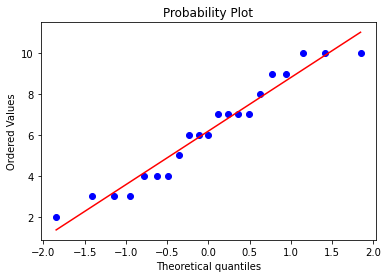

In [13]:
stats.probplot(del_data['Sorting Time'],plot=plt)
plt.show()

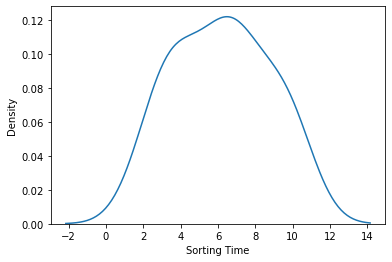

In [14]:
sns.distplot(a=del_data['Sorting Time'],hist=False)
plt.show()

### Normailty Test is failed.

# 4. Model Building || 5. Model Training

In [15]:
del_data =del_data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
del_data.columns

Index(['delivery_time', 'sorting_time'], dtype='object')

In [16]:
X = del_data['sorting_time']
y = del_data['delivery_time']

In [17]:
model_1 = smf.ols(formula='y~X',data=del_data).fit()

In [18]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 13 May 2022   Prob (F-statistic):           3.98e-06
Time:                        11:34:57   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
X              1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# -------------------------------------------------------------------

# =========================================

# Data Transformation

## LOG Transformation

In [20]:
X_log = np.log(del_data['sorting_time'])
model_2 = smf.ols(formula='y~X_log',data = del_data).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 13 May 2022   Prob (F-statistic):           2.64e-06
Time:                        10:13:16   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
X_log          9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# -----------------------------------------------------------------

## EXPONENTIAL Transformation

In [19]:
X_exp = X**(1/1.2)
model_3 = smf.ols(formula='y~X_exp',data = del_data).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     41.91
Date:                Fri, 13 May 2022   Prob (F-statistic):           3.33e-06
Time:                        11:36:51   Log-Likelihood:                -51.163
No. Observations:                  21   AIC:                             106.3
Df Residuals:                      19   BIC:                             108.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7536      1.965      2.420      0.026       0.642       8.866
X_exp          2.6666      0.412      6.474      0.000       1.804       3.529
==============================================================================
Omnibus:                        4.002   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.135   Jarque-Bera (JB):                2.340
Skew:                           0.792   Prob(JB):                        0.310
Kurtosis:                       3.406   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## RECIPROCAL Transformation

In [20]:
X_reci = 1/X
model_4 = smf.ols(formula='y~X_reci',data = del_data).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     34.27
Date:                Fri, 13 May 2022   Prob (F-statistic):           1.23e-05
Time:                        11:36:59   Log-Likelihood:                -52.571
No. Observations:                  21   AIC:                             109.1
Df Residuals:                      19   BIC:                             111.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.5196      1.484     16.518      0.000      21.413      27.626
X_reci       -38.9338      6.651     -5.854      0.000     -52.854     -25.014
==============================================================================
Omnibus:                        7.255   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                4.797
Skew:                           1.050   Prob(JB):                       0.0909
Kurtosis:                       4.037   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## BoxCox Transformation

In [21]:
X_boxcox,param = stats.boxcox(del_data['sorting_time'])
model_5 = smf.ols(formula='y~X_boxcox',data = del_data).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     42.66
Date:                Fri, 13 May 2022   Prob (F-statistic):           2.96e-06
Time:                        11:37:03   Log-Likelihood:                -51.035
No. Observations:                  21   AIC:                             106.1
Df Residuals:                      19   BIC:                             108.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6768      1.672      3.993      0.001       3.177      10.176
X_boxcox       2.8170      0.431      6.532      0.000       1.914       3.720
==============================================================================
Omnibus:                        4.275   Durbin-Watson:                   1.284
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                2.541
Skew:                           0.824   Prob(JB):                        0.281
Kurtosis:                       3.437   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## SQUARE ROOT Transformation

In [22]:
X_sqrt  = np.sqrt(del_data['sorting_time'])    #X_sqrt_1  = del_data['sorting_time']**(1/2) ---- similar with this
model_6 = smf.ols(formula='y~X_sqrt',data = del_data).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Fri, 13 May 2022   Prob (F-statistic):           2.61e-06
Time:                        11:37:34   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5188      2.995     -0.841      0.411      -8.788       3.751
X_sqrt         7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## CUBE ROOT Transformation

In [23]:
X_cbrt  = np.cbrt(del_data['sorting_time'])  
model_7 = smf.ols(formula='y~X_cbrt',data = del_data).fit()
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     43.79
Date:                Fri, 13 May 2022   Prob (F-statistic):           2.48e-06
Time:                        11:43:48   Log-Likelihood:                -50.844
No. Observations:                  21   AIC:                             105.7
Df Residuals:                      19   BIC:                             107.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5792      4.332     -2.673      0.015     -20.647      -2.511
X_cbrt        15.7673      2.383      6.618      0.000      10.780      20.754
==============================================================================
Omnibus:                        4.963   Durbin-Watson:                   1.351
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                3.050
Skew:                           0.896   Prob(JB):                        0.218
Kurtosis:                       3.525   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## MIN-MAX Scaler

In [24]:
min = X.min()
max = X.max()
print(min,',',max)

2 , 10


In [25]:
X_minmax = (X-min)/(max-min)
X_minmax

0     1.000
1     0.250
2     0.500
3     0.875
4     1.000
5     0.500
6     0.625
7     0.125
8     1.000
9     0.875
10    0.750
11    0.250
12    0.625
13    0.125
14    0.125
15    0.250
16    0.500
17    0.625
18    0.000
19    0.625
20    0.375
Name: sorting_time, dtype: float64

In [26]:
model_8 = smf.ols(formula='y~X_minmax',data = del_data).fit()
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 13 May 2022   Prob (F-statistic):           3.98e-06
Time:                        11:44:33   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.8808      1.257      7.859      0.000       7.249      12.512
X_minmax      13.1922      2.065      6.387      0.000       8.869      17.515
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         4.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# OR

In [34]:
a = del_data['sorting_time']
b = del_data['delivery_time']
model_8_ = smf.ols(formula='b~a',data=del_data).fit()
model_8_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      b   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 13 May 2022   Prob (F-statistic):           3.98e-06
Time:                        11:48:01   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
a              1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# OR

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([0.        , 0.07142857, 0.13095238, 0.16666667, 0.19190476,
         0.26190476, 0.27380952, 0.32761905, 0.35      , 0.41333333,
         0.46809524, 0.47142857, 0.48142857, 0.51190476, 0.52380952,
         0.55952381, 0.56333333, 0.61904762, 0.64285714, 0.76190476,
         1.        ])),
 (0.2508367210269824, 0.4186167800453514, 0.9870617551853575))

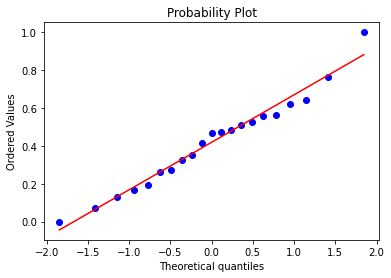

In [35]:
X = del_data.iloc[:, :-1]

scaler_mn = MinMaxScaler()
min_max_X = scaler_mn.fit_transform(X)

X_data_mn = pd.DataFrame(min_max_X)
X_data_mn.rename(columns={0:'sorting_t'})
X_data_mn.insert(1,'delivery_t',del_data['delivery_time'])

mn_data = X_data_mn
new_mn_data = mn_data.rename(columns={0:'sorting_t'})

X= new_mn_data['sorting_t']

stats.probplot(X,plot=plt)

In [36]:
n = new_mn_data['sorting_t'] #i/p
m = new_mn_data['delivery_t']
new_mn_model_8 = smf.ols('m~n',data=new_mn_data).fit()
new_mn_model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      m   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.542e+31
Date:                Fri, 13 May 2022   Prob (F-statistic):          1.14e-287
Time:                        11:48:29   Log-Likelihood:                 664.98
No. Observations:                  21   AIC:                            -1326.
Df Residuals:                      19   BIC:                            -1324.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.0000      2e-15      4e+15      0.000       8.000       8.000
n             21.0000   4.16e-15   5.04e+15      0.000      21.000      21.000
==============================================================================
Omnibus:                        9.941   Durbin-Watson:                   0.213
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                7.616
Skew:                           1.381   Prob(JB):                       0.0222
Kurtosis:                       4.036   Cond. No.                         5.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## STANDARD  Scaler

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([-1.77501902, -1.47214757, -1.21975469, -1.06831896, -0.96130438,
         -0.66449036, -0.61401178, -0.38584862, -0.2909489 , -0.02240287,
          0.20979858,  0.22393258,  0.26633458,  0.39555973,  0.44603831,
          0.59747404,  0.61362718,  0.84986692,  0.95082407,  1.45560983,
          2.46518134])),
 (1.063597956083844, -5.102203508824861e-16, 0.9870617551853571))

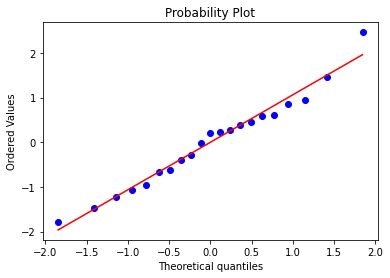

In [37]:
X = del_data.iloc[:, :-1]

scaler = StandardScaler()
standard_X = scaler.fit_transform(X)

X_data_std = pd.DataFrame(standard_X)
X_data_std.rename(columns={0:'sorting_t'})
X_data_std.insert(1,'delivery_t',del_data['delivery_time'])

standard_data = X_data_std
new_std_data = standard_data.rename(columns={0:'sorting_t'})

X= new_std_data['sorting_t']

stats.probplot(X,plot=plt)

In [38]:
n = new_std_data['sorting_t'] #i/p
m = new_std_data['delivery_t']
new_std_model_9 = smf.ols('m~n',data=new_std_data).fit()
new_std_model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      m   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.941e+30
Date:                Fri, 13 May 2022   Prob (F-statistic):          8.50e-284
Time:                        11:48:47   Log-Likelihood:                 655.12
No. Observations:                  21   AIC:                            -1306.
Df Residuals:                      19   BIC:                            -1304.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.7910   1.57e-15   1.07e+16      0.000      16.791      16.791
n              4.9526   1.57e-15   3.15e+15      0.000       4.953       4.953
==============================================================================
Omnibus:                        1.728   Durbin-Watson:                   0.115
Prob(Omnibus):                  0.421   Jarque-Bera (JB):                0.561
Skew:                           0.331   Prob(JB):                        0.755
Kurtosis:                       3.451   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## ROBUST Scaler

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([-1.5728, -1.3328, -1.1328, -1.0128, -0.928 , -0.6928, -0.6528,
         -0.472 , -0.3968, -0.184 ,  0.    ,  0.0112,  0.0448,  0.1472,
          0.1872,  0.3072,  0.32  ,  0.5072,  0.5872,  0.9872,  1.7872])),
 (0.8428113826506608, -0.16624761904761884, 0.9870617551853574))

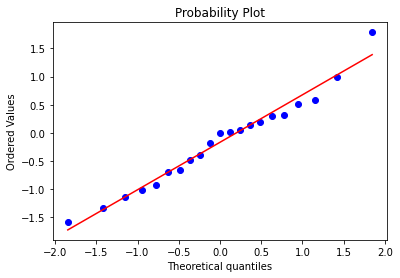

In [39]:
X = del_data.iloc[:, :-1]

scaler = RobustScaler()
robust_X = scaler.fit_transform(X)

X_data = pd.DataFrame(robust_X)
X_data.rename(columns={0:'sorting_t'})
X_data.insert(1,'delivery_t',del_data['delivery_time'])

robust_data = X_data
new_data = robust_data.rename(columns={0:'sorting_t'})

X= new_data['sorting_t']

stats.probplot(X,plot=plt)

In [40]:
n = new_data['sorting_t']
m = new_data['delivery_t']
new_model_10 = smf.ols('m~n',data=new_data).fit()
new_model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      m   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.565e+31
Date:                Fri, 13 May 2022   Prob (F-statistic):          4.58e-289
Time:                        11:49:10   Log-Likelihood:                 668.53
No. Observations:                  21   AIC:                            -1333.
Df Residuals:                      19   BIC:                            -1331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.8300   8.48e-16    2.1e+16      0.000      17.830      17.830
n              6.2500   1.05e-15   5.97e+15      0.000       6.250       6.250
==============================================================================
Omnibus:                       10.132   Durbin-Watson:                   0.253
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                7.654
Skew:                           1.261   Prob(JB):                       0.0218
Kurtosis:                       4.545   Cond. No.                         1.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Building using sklearn library

## Min-Max scaler

In [44]:
lr = LinearRegression()
X = new_mn_data['sorting_t'].values.reshape(-1,1)
y = new_mn_data['delivery_t'].values.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
model_11 = lr.fit(X_train,y_train)

In [49]:
model_11_pred = model_11.predict(X_test)

In [52]:
comp_df = pd.DataFrame({"Actual":y_test.flatten(),'Predicted':model_11_pred.flatten(),'difference':y_test.flatten()-model_11_pred.flatten()})
comp_df

,Actual,Predicted,difference
0,21.00,21.00,0.000000e+00
1,18.11,18.11,0.000000e+00
2,14.88,14.88,-1.776357e-15
3,13.50,13.50,-1.776357e-15
4,17.90,17.90,0.000000e+00


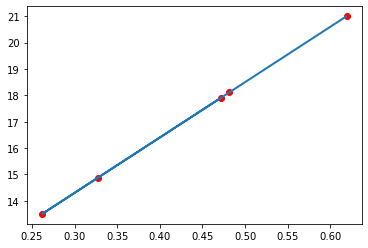

In [53]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,model_11_pred,linewidth=2)

In [54]:
print('Mean Absolute Error    :', mean_absolute_error(y_test, model_11_pred))  
print('Mean Squared Error     :', mean_squared_error(y_test, model_11_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, model_11_pred)))
print("R^2 Score              :", r2_score(y_test, model_11_pred))

Mean Absolute Error    : 7.105427357601002e-16
Mean Squared Error     : 1.262177448353619e-30
Root Mean Squared Error: 1.1234667099445444e-15
R^2 Score              : 1.0


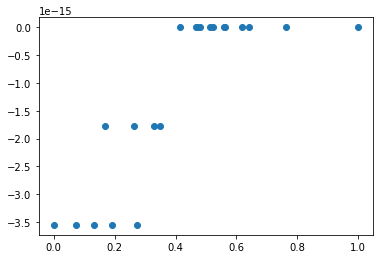

In [55]:
error = y - model_11.predict(X)
plt.scatter(X,error)

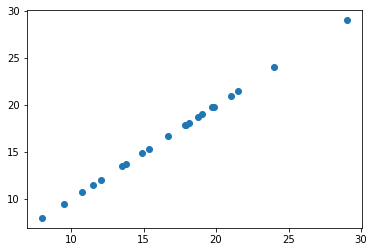

In [56]:
plt.scatter(y,model_11.predict(X))

## Standard Scaler

Mean Absolute Error    : 3.552713678800501e-15
Mean Squared Error     : 1.6408306828597046e-29
Root Mean Squared Error: 4.050716828981884e-15
R^2 Score              : 1.0


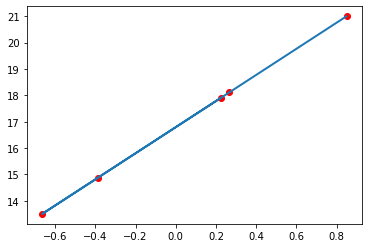

In [60]:
X = new_std_data['sorting_t'].values.reshape(-1,1)
y = new_std_data['delivery_t'].values.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
model_12 = lr.fit(X_train,y_train)
model_12_pred = model_12.predict(X_test)
comp_df = pd.DataFrame({"Actual":y_test.flatten(),'Predicted':model_12_pred.flatten(),'difference':y_test.flatten()-model_11_pred.flatten()})
comp_df
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,model_12_pred,linewidth=2)
print('Mean Absolute Error    :', mean_absolute_error(y_test, model_12_pred))  
print('Mean Squared Error     :', mean_squared_error(y_test, model_12_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, model_12_pred)))
print("R^2 Score              :", r2_score(y_test, model_12_pred))
error = y - model_12.predict(X)

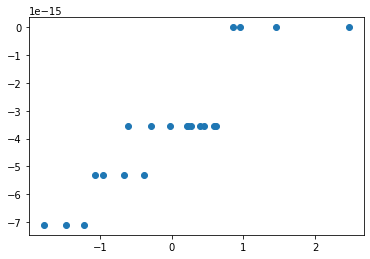

In [61]:
plt.scatter(X,error)

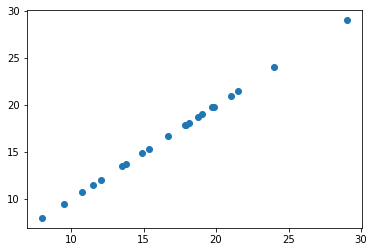

In [59]:
plt.scatter(y,model_11.predict(X))

## robust scaler

Mean Absolute Error    : 3.552713678800501e-16
Mean Squared Error     : 6.310887241768095e-31
Root Mean Squared Error: 7.944109290391273e-16
R^2 Score              : 1.0


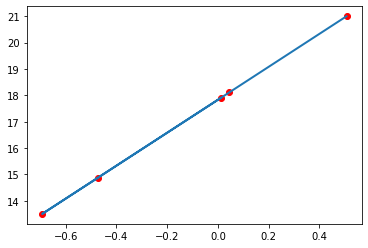

In [63]:
X = new_data['sorting_t'].values.reshape(-1,1)
y = new_data['delivery_t'].values.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
model_13 = lr.fit(X_train,y_train)
model_13_pred = model_13.predict(X_test)
comp_df = pd.DataFrame({"Actual":y_test.flatten(),'Predicted':model_11_pred.flatten(),'difference':y_test.flatten()-model_11_pred.flatten()})
comp_df
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,model_13_pred,linewidth=2)
print('Mean Absolute Error    :', mean_absolute_error(y_test, model_13_pred))  
print('Mean Squared Error     :', mean_squared_error(y_test, model_13_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, model_13_pred)))
print("R^2 Score              :", r2_score(y_test, model_13_pred))

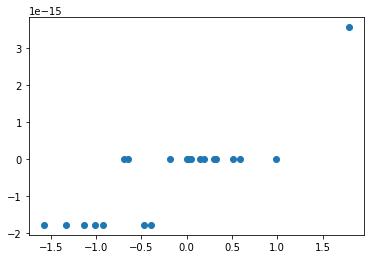

In [66]:
# Homoscedascity Check
error = y - model_13.predict(X)
plt.scatter(X,error)

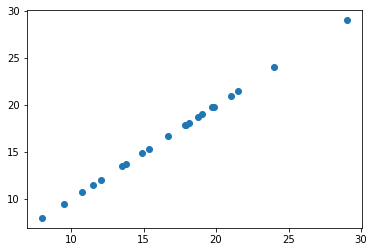

In [65]:
#Zero Residual Mean Test
plt.scatter(y,model_13.predict(X))

# model_1 - without any transformation

In [68]:
X = del_data['sorting_time'].values.reshape(-1,1)
y = del_data['delivery_time'].values.reshape(-1,1)

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
model_1s = lr.fit(X_train,y_train)
model_1s_pred = model_1s.predict(X_test)
comp_df = pd.DataFrame({"Actual":y_test.flatten(),'Predicted':model_1s_pred.flatten(),'difference':y_test.flatten()-model_1s_pred.flatten()})
comp_df

,Actual,Predicted,difference
0,21.00,24.924743,-3.924743
1,18.11,18.852010,-0.742010
2,14.88,12.779276,2.100724
3,13.50,12.779276,0.720724
4,17.90,24.924743,-7.024743


Mean Absolute Error    : 2.9025888966971176
Mean Squared Error     : 14.046738956635016
Root Mean Squared Error: 3.7478979383962705
R^2 Score              : -1.0207599586367362


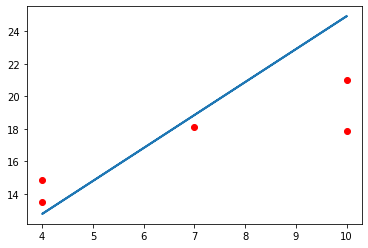

In [81]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,model_1s_pred,linewidth=2)
print('Mean Absolute Error    :', mean_absolute_error(y_test, model_1s_pred))  
print('Mean Squared Error     :', mean_squared_error(y_test, model_1s_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, model_1s_pred)))
print("R^2 Score              :", r2_score(y_test, model_1s_pred))

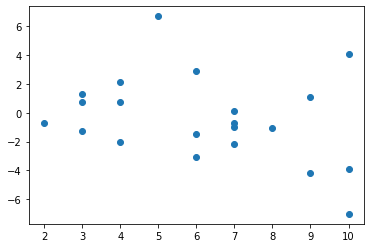

In [82]:
# Homoscedascity Check
error = y - model_1s.predict(X)
plt.scatter(X,error)

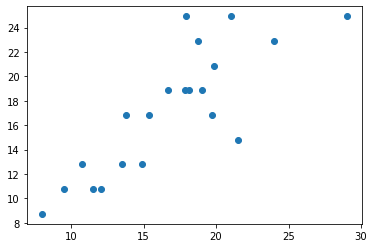

In [83]:
#Zero Residual Mean Test
plt.scatter(y,model_1s.predict(X))

# log transformation

In [89]:
X_log = np.log(del_data['sorting_time']).values.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X_log,y,test_size=0.20,random_state=42)
model_2s = lr.fit(X_train,y_train)
model_2s_pred = model_2s.predict(X_test)
comp_df = pd.DataFrame({"Actual":y_test.flatten(),'Predicted':model_2s_pred.flatten(),'difference':y_test.flatten()-model_2s_pred.flatten()})
comp_df

,Actual,Predicted,difference
0,21.00,22.927130,-1.927130
1,18.11,19.326312,-1.216312
2,14.88,13.676702,1.203298
3,13.50,13.676702,-0.176702
4,17.90,22.927130,-5.027130


Mean Absolute Error    : 1.910114526185978
Mean Squared Error     : 6.388886730349971
Root Mean Squared Error: 2.5276247210276233
R^2 Score              : 0.08089653229737481


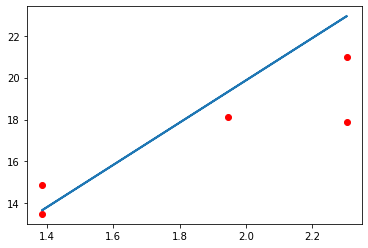

In [90]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,model_2s_pred,linewidth=2)
print('Mean Absolute Error    :', mean_absolute_error(y_test, model_2s_pred))  
print('Mean Squared Error     :', mean_squared_error(y_test, model_2s_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, model_2s_pred)))
print("R^2 Score              :", r2_score(y_test, model_2s_pred))

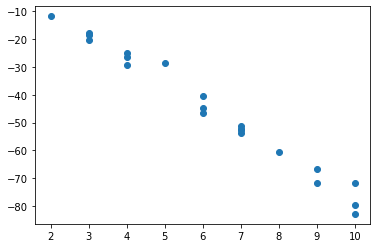

In [91]:
# Homoscedascity Check
error = y - model_2s.predict(X)
plt.scatter(X,error)

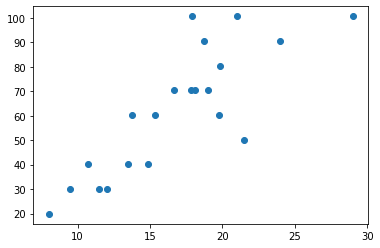

In [92]:
#Zero Residual Mean Test
plt.scatter(y,model_2s.predict(X))

## square root

In [98]:
X_sqrt = np.sqrt(del_data['sorting_time']).values.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X_sqrt,y,test_size=0.20,random_state=42)
model_3s = lr.fit(X_train,y_train)
model_3s_pred = model_3s.predict(X_test)
comp_df = pd.DataFrame({"Actual":y_test.flatten(),'Predicted':model_3s_pred.flatten(),'difference':y_test.flatten()-model_3s_pred.flatten()})
comp_df

,Actual,Predicted,difference
0,21.00,23.939550,-2.939550
1,18.11,19.143785,-1.033785
2,14.88,13.148212,1.731788
3,13.50,13.148212,0.351788
4,17.90,23.939550,-6.039550


Mean Absolute Error    : 2.4192921327719605
Mean Squared Error     : 9.861733819035146
Root Mean Squared Error: 3.1403397617192867
R^2 Score              : -0.41870628376893304


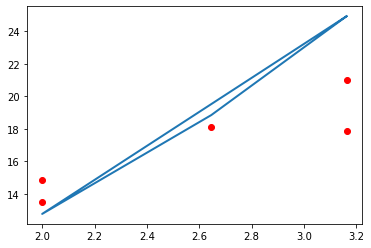

In [99]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,model_1s_pred,linewidth=2)
print('Mean Absolute Error    :', mean_absolute_error(y_test, model_3s_pred))  
print('Mean Squared Error     :', mean_squared_error(y_test, model_3s_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, model_3s_pred)))
print("R^2 Score              :", r2_score(y_test, model_3s_pred))

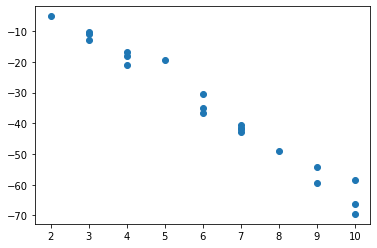

In [100]:
# Homoscedascity Check
error = y - model_3s.predict(X)
plt.scatter(X,error)

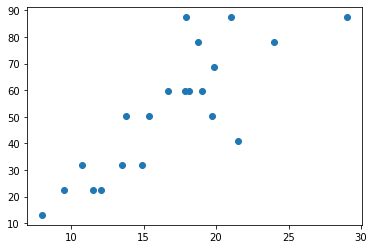

In [101]:
#Zero Residual Mean Test
plt.scatter(y,model_3s.predict(X))

## exp

In [102]:
X_exp = X**(1/1.2)
X_train,X_test,y_train,y_test = train_test_split(X_exp,y,test_size=0.20,random_state=42)
model_4s = lr.fit(X_train,y_train)
model_4s_pred = model_4s.predict(X_test)
comp_df = pd.DataFrame({"Actual":y_test.flatten(),'Predicted':model_4s_pred.flatten(),'difference':y_test.flatten()-model_4s_pred.flatten()})
comp_df

,Actual,Predicted,difference
0,21.00,24.602893,-3.602893
1,18.11,18.959685,-0.849685
2,14.88,12.883013,1.996987
3,13.50,12.883013,0.616987
4,17.90,24.602893,-6.702893


Mean Absolute Error    : 2.753889216990811
Mean Squared Error     : 12.60004152113747
Root Mean Squared Error: 3.549653718482617
R^2 Score              : -0.8126384680230727


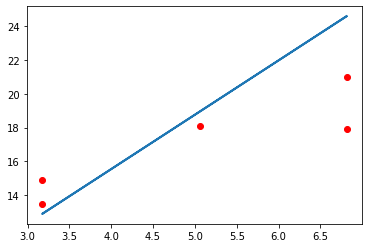

In [105]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,model_4s_pred,linewidth=2)
print('Mean Absolute Error    :', mean_absolute_error(y_test, model_4s_pred))  
print('Mean Squared Error     :', mean_squared_error(y_test, model_4s_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, model_4s_pred)))
print("R^2 Score              :", r2_score(y_test, model_4s_pred))

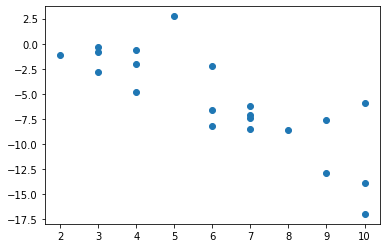

In [106]:
# Homoscedascity Check
error = y - model_4s.predict(X)
plt.scatter(X,error)

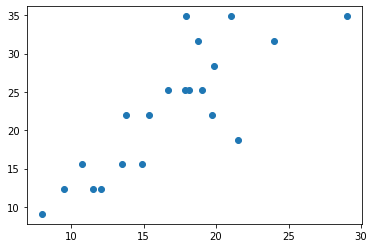

In [107]:
#Zero Residual Mean Test
plt.scatter(y,model_4s.predict(X))

## cube root

In [108]:
X_cbrt = np.cbrt(X)
X_train,X_test,y_train,y_test = train_test_split(X_cbrt,y,test_size=0.20,random_state=42)
model_5s = lr.fit(X_train,y_train)
model_5s_pred = model_5s.predict(X_test)
comp_df = pd.DataFrame({"Actual":y_test.flatten(),'Predicted':model_5s_pred.flatten(),'difference':y_test.flatten()-model_5s_pred.flatten()})
comp_df

,Actual,Predicted,difference
0,21.00,23.602188,-2.602188
1,18.11,19.217947,-1.107947
2,14.88,13.308292,1.571708
3,13.50,13.308292,0.191708
4,17.90,23.602188,-5.702188


Mean Absolute Error    : 2.2351478387878085
Mean Squared Error     : 8.604179509427402
Root Mean Squared Error: 2.9332881736078034
R^2 Score              : -0.23779487062801707


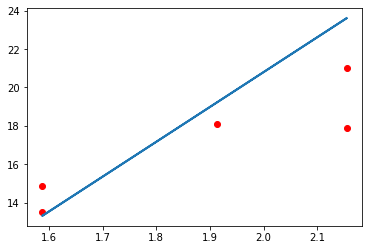

In [109]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,model_5s_pred,linewidth=2)
print('Mean Absolute Error    :', mean_absolute_error(y_test, model_5s_pred))  
print('Mean Squared Error     :', mean_squared_error(y_test, model_5s_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, model_5s_pred)))
print("R^2 Score              :", r2_score(y_test, model_5s_pred))

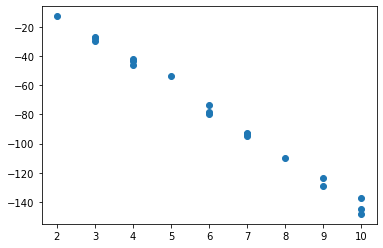

In [110]:
# Homoscedascity Check
error = y - model_5s.predict(X)
plt.scatter(X,error)

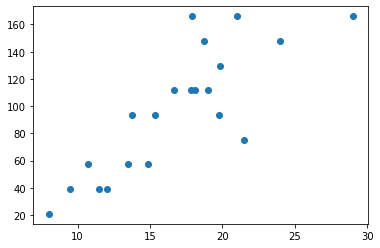

In [111]:
#Zero Residual Mean Test
plt.scatter(y,model_5s.predict(X))

## boxcox

In [113]:
X_boxcox,param = stats.boxcox(del_data['sorting_time'])
X_boxcox = X_boxcox.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X_boxcox,y,test_size=0.20,random_state=42)
model_6s = lr.fit(X_train,y_train)
model_6s_pred = model_6s.predict(X_test)
comp_df = pd.DataFrame({"Actual":y_test.flatten(),'Predicted':model_6s_pred.flatten(),'difference':y_test.flatten()-model_6s_pred.flatten()})
comp_df

,Actual,Predicted,difference
0,21.00,24.337280,-3.337280
1,18.11,19.039489,-0.929489
2,14.88,12.981095,1.898905
3,13.50,12.981095,0.518905
4,17.90,24.337280,-6.437280


Mean Absolute Error    : 2.624372091340157
Mean Squared Error     : 11.463014697034144
Root Mean Squared Error: 3.3857074145640738
R^2 Score              : -0.64906610541726


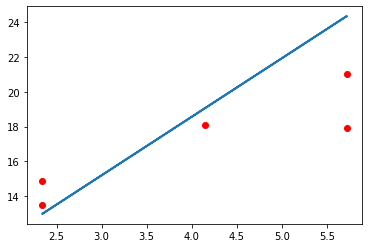

In [114]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,model_6s_pred,linewidth=2)
print('Mean Absolute Error    :', mean_absolute_error(y_test, model_6s_pred))  
print('Mean Squared Error     :', mean_squared_error(y_test, model_6s_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, model_6s_pred)))
print("R^2 Score              :", r2_score(y_test, model_6s_pred))

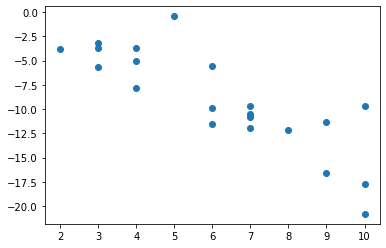

In [115]:
# Homoscedascity Check
error = y - model_6s.predict(X)
plt.scatter(X,error)

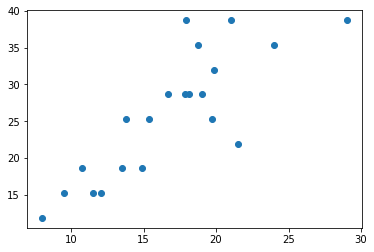

In [116]:
#Zero Residual Mean Test
plt.scatter(y,model_6s.predict(X))

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
model_1s = lr.fit(X_train,y_train)
model_1s_pred = model_1s.predict(X_test)
comp_df = pd.DataFrame({"Actual":y_test.flatten(),'Predicted':model_1s_pred.flatten(),'difference':y_test.flatten()-model_1s_pred.flatten()})
comp_df

,Actual,Predicted,difference
0,21.00,24.924743,-3.924743
1,18.11,18.852010,-0.742010
2,14.88,12.779276,2.100724
3,13.50,12.779276,0.720724
4,17.90,24.924743,-7.024743


Mean Absolute Error    : 2.9025888966971176
Mean Squared Error     : 14.046738956635016
Root Mean Squared Error: 3.7478979383962705
R^2 Score              : -1.0207599586367362


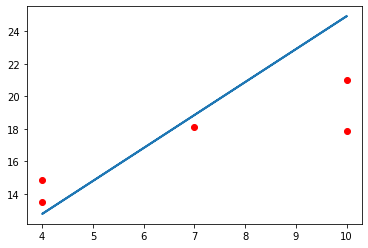

In [81]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,model_1s_pred,linewidth=2)
print('Mean Absolute Error    :', mean_absolute_error(y_test, model_1s_pred))  
print('Mean Squared Error     :', mean_squared_error(y_test, model_1s_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, model_1s_pred)))
print("R^2 Score              :", r2_score(y_test, model_1s_pred))

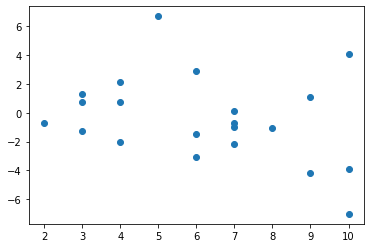

In [82]:
# Homoscedascity Check
error = y - model_1s.predict(X)
plt.scatter(X,error)

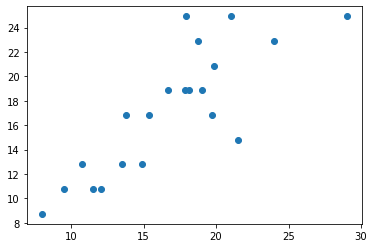

In [83]:
#Zero Residual Mean Test
plt.scatter(y,model_1s.predict(X))

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
model_1s = lr.fit(X_train,y_train)
model_1s_pred = model_1s.predict(X_test)
comp_df = pd.DataFrame({"Actual":y_test.flatten(),'Predicted':model_1s_pred.flatten(),'difference':y_test.flatten()-model_1s_pred.flatten()})
comp_df

,Actual,Predicted,difference
0,21.00,24.924743,-3.924743
1,18.11,18.852010,-0.742010
2,14.88,12.779276,2.100724
3,13.50,12.779276,0.720724
4,17.90,24.924743,-7.024743


Mean Absolute Error    : 2.9025888966971176
Mean Squared Error     : 14.046738956635016
Root Mean Squared Error: 3.7478979383962705
R^2 Score              : -1.0207599586367362


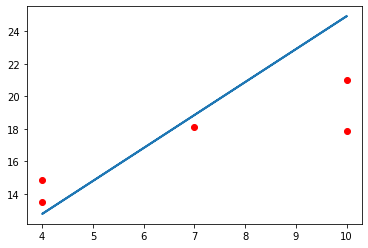

In [81]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,model_1s_pred,linewidth=2)
print('Mean Absolute Error    :', mean_absolute_error(y_test, model_1s_pred))  
print('Mean Squared Error     :', mean_squared_error(y_test, model_1s_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, model_1s_pred)))
print("R^2 Score              :", r2_score(y_test, model_1s_pred))

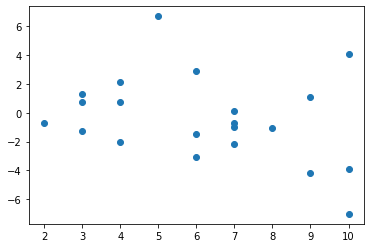

In [82]:
# Homoscedascity Check
error = y - model_1s.predict(X)
plt.scatter(X,error)

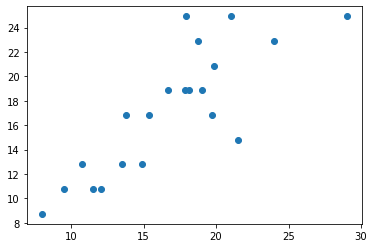

In [83]:
#Zero Residual Mean Test
plt.scatter(y,model_1s.predict(X))

# Choose the model

new_std_model_9 is the best model, since R-square is 1 and skewness is between -0.5 and 0.5.